In [1]:
    from pathlib import Path
    from requests import get
    import pandas as pd

In [2]:
    phones_xls = Path("mobile_phones_by_year_and_country.xls")
    if not phones_xls.exists():
        phones_xls.write_bytes(get("http://api.worldbank.org/v2/en/indicator/IT.CEL.SETS.P2?downloadformat=excel").content)
    phones_raw = pd.read_excel(phones_xls, header=2)
    phones_df = pd.melt(
        phones_raw, 
        id_vars=["Country Code", "Country Name", "Indicator Name", "Indicator Code"],
        var_name="Year",
        value_name="Phones per 100").dropna()
    phones_df["Phones per capita"] = phones_df["Phones per 100"] / 100.0
    phones_df = phones_df.set_index(["Country Code", "Year"])[["Phones per capita"]]
    phones_df.tail(3)

Phones per capita
Country Code Year                   
ZAF          2016           1.423848
ZMB          2016           0.749477
ZWE          2016           0.831799

In [3]:
    pop_xls = Path("population_by_year_and_country.xls")
    if not pop_xls.exists():
        pop_xls.write_bytes(get("http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel").content)
    pop_raw = pd.read_excel(pop_xls, header=2)

    pop_df = pd.melt(
        pop_raw,
        id_vars=["Country Code", "Country Name", "Indicator Name", "Indicator Code"],
        var_name="Year",
        value_name="Population").dropna()
    # df["Phones per capita"] = df["Phones per 100"] / 100.0
    # df.tail()[["Country Code", "Country Name", "Year", "Phones per capita"]]
    pop_df = pop_df.set_index(["Country Code", "Year"])[["Country Name", "Population"]]
    pop_df.tail(3)

Country Name  Population
Country Code Year                          
ZAF          2016  South Africa  55908865.0
ZMB          2016        Zambia  16591390.0
ZWE          2016      Zimbabwe  16150362.0

In [4]:
    joined = pop_df.join(phones_df, how="outer")
    joined["Total Phones"] = joined["Population"] * joined["Phones per capita"]
    joined.dropna()

Country Name  Population  Phones per capita  Total Phones
Country Code Year                                                          
ABW          1960        Aruba     54211.0           0.000000  0.000000e+00
             1965        Aruba     57360.0           0.000000  0.000000e+00
             1970        Aruba     59063.0           0.000000  0.000000e+00
             1975        Aruba     60657.0           0.000000  0.000000e+00
             1976        Aruba     60586.0           0.000000  0.000000e+00
             1977        Aruba     60366.0           0.000000  0.000000e+00
             1978        Aruba     60103.0           0.000000  0.000000e+00
             1979        Aruba     59980.0           0.000000  0.000000e+00
             1980        Aruba     60096.0           0.000000  0.000000e+00
             1981        Aruba     60567.0           0.000000  0.000000e+00
             1982        Aruba     61345.0           0.000000  0.000000e+00
             1983        Aruba     62201.0           0.000000  0.000000e+00
             1984        Aruba     62836.0           0.000000  0.000000e+00
             1985        Aruba     63026.0           0.000000  0.000000e+00
             1986        Aruba     62644.0           0.000000  0.000000e+00
             1987        Aruba     61833.0           0.000000  0.000000e+00
             1988        Aruba     61079.0           0.000000  0.000000e+00
             1989        Aruba     61032.0           0.000000  0.000000e+00
             1990        Aruba     62149.0           0.000000  0.000000e+00
             1991        Aruba     64622.0           0.000000  0.000000e+00
             1992        Aruba     68235.0           0.000293  2.000000e+01
             1995        Aruba     80324.0           0.021388  1.717957e+03
             1996        Aruba     83200.0           0.036060  3.000180e+03
             1997        Aruba     85451.0           0.039814  3.402159e+03
             1998        Aruba     87277.0           0.061644  5.380062e+03
             1999        Aruba     89005.0           0.134825  1.200013e+04
             2000        Aruba     90853.0           0.165093  1.499917e+04
             2001        Aruba     92898.0           0.570543  5.300228e+04
             2002        Aruba     94992.0           0.650561  6.179805e+04
             2003        Aruba     97017.0           0.721043  6.995344e+04
...                        ...         ...                ...           ...
ZWE          1987     Zimbabwe   9293283.0           0.000000  0.000000e+00
             1988     Zimbabwe   9604302.0           0.000000  0.000000e+00
             1989     Zimbabwe   9902540.0           0.000000  0.000000e+00
             1990     Zimbabwe  10183113.0           0.000000  0.000000e+00
             1991     Zimbabwe  10443043.0           0.000000  0.000000e+00
             1992     Zimbabwe  10682868.0           0.000000  0.000000e+00
             1993     Zimbabwe  10905756.0           0.000000  0.000000e+00
             1994     Zimbabwe  11116948.0           0.000000  0.000000e+00
             1995     Zimbabwe  11320346.0           0.000000  0.000000e+00
             1996     Zimbabwe  11518262.0           0.000000  0.000000e+00
             1997     Zimbabwe  11709997.0           0.000476  5.574146e+03
             1998     Zimbabwe  11893272.0           0.001554  1.847763e+04
             1999     Zimbabwe  12064537.0           0.014050  1.695015e+05
             2000     Zimbabwe  12222251.0           0.021309  2.604446e+05
             2001     Zimbabwe  12366165.0           0.024947  3.084987e+05
             2002     Zimbabwe  12500525.0           0.026800  3.350163e+05
             2003     Zimbabwe  12633897.0           0.028695  3.625260e+05
             2004     Zimbabwe  12777511.0           0.033542  4.285781e+05
             2005     Zimbabwe  12940032.0           0.050911  6.587912e+05
             2006     Zimbabwe  13124267.0           0.066734  8.7

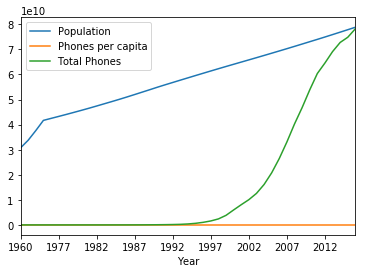

In [5]:
    %matplotlib inline
    joined.groupby(["Year"]).agg("sum").dropna().plot()